In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
tax = pd.read_excel('tax.xlsx')
tax = tax.rename(columns = {"Tax revenue (% of GDP)": "country"})
tax2 = tax.set_index("country")
tax_safta = tax2.loc[["India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]]
tax_not_safta = tax2.loc[["Philippines", "Malaysia", "Iran", "Jordan", "Myanmar"]]
tax_all = tax2.loc[["Philippines", "Malaysia", "Iran", "Jordan", "Myanmar", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]]
tax_all.insert(0, "SAFTA", 0)
df = tax.copy()
df = pd.melt(df,id_vars = ["country"], value_name="Tax").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df["year"] = df["year"].astype(int)
imp2 = pd.read_excel('import.xlsx')
imp3 = imp2.rename(columns = {"Imports of goods and services (% of GDP)": "country"})
imp3 = imp3.set_index("country")
imp4 = imp3.loc[["Philippines", "Malaysia", "Iran", "Jordan", "Myanmar", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]]
imp4 = imp4.reset_index()
df_imp = imp4.copy()
df_imp = pd.melt(df_imp,id_vars = ["country"], value_name="imp").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df_imp["year"] = df_imp["year"].astype(int)
df_safta2 = tax_safta.copy()
df_safta = df_safta2.reset_index()
df_safta = pd.melt(df_safta,id_vars = ["country"], value_name="Tax").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df_safta["year"] = df_safta["year"].astype(int)
df_not_safta2 = tax_not_safta.copy()
df_not_safta = df_not_safta2.reset_index()
df_not_safta = pd.melt(df_not_safta,id_vars = ["country"], value_name="Tax").sort_values('variable').rename(columns = {"variable": "year"}).dropna()
df_not_safta["year"] = df_not_safta["year"].astype(int)

## Relação entre a participação no Acordo de livre comércio do sul da Ásia (SAFTA) e arrecadação de impostos.

### Hipótese: Países que entraram no SAFTA em 2004 apresentaram queda na arrecadação de impostos (% do PIB).

### Mecanismo: O Acordo de livre comércio do sul da Ásia (https://commerce.gov.in/writereaddata/trade/safta.pdf) criou uma zona de livre comércio entre seus países membros, eliminando barreiras alfandegárias entre eles, como impostos e tarifas de importação. Com o fim desses impostos e tarifas de importação, é plausível que a arrecadação de impostos dos países membros tenha diminuído após a entrada na SAFTA.

#### Os datasets utilizados no presente trabalho foram obtidos no site Gapminder.com, e podem ser diretamente acessados nos seguintes links:

#### Tax Revenue(% of GDP): https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS
#### Imports (% of GDP): https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS



## Análise Inicial:
### Em primeiro lugar, foi criado um dataset da arrecadação de impostos (% do PIB) de 10 países da região sul asiática e seus redores, sendo que 5 desses países são membros da SAFTA (India, Maldivas, Nepal, Paquistão e Sri Lanka), e os outros 5 (Filipinas, Irã, Jordania, Myanmar e Malásia) não são.

In [16]:
tax_all
paises = ["India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
for i in tax_all.index.tolist(): 
    tax_all.SAFTA[i] = int(i in paises)
tax_all

C:\Users\crazy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,SAFTA,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Philippines,0,14.082324,14.605240,15.441797,15.610493,16.025747,16.291972,16.938638,16.984287,14.108317,...,11.823039,12.103291,11.814621,12.427811,13.711296,13.535104,13.588812,12.230420,12.146892,NaN
Malaysia,0,NaN,NaN,NaN,NaN,NaN,NaN,19.377850,19.753367,16.730158,...,17.446955,15.495655,15.199094,15.426121,15.080807,14.822605,15.205630,15.663841,14.297684,NaN
Iran,0,5.993785,6.658888,7.440989,4.095074,4.678152,6.603632,8.652779,10.989559,9.285579,...,5.518011,5.897925,6.048875,7.851609,7.428923,7.262472,7.556702,9.256529,NaN,NaN
Jordan,0,18.632837,18.596897,22.972247,20.918561,19.987421,20.709074,21.686583,19.049922,18.119232,...,17.478000,18.213653,20.996084,24.415812,23.631264,23.779628,17.122557,16.165082,15.290352,NaN
Myanmar,0,6.197784,5.610206,5.037397,4.728010,4.251713,3.744487,3.959317,4.415239,3.519310,...,2.001047,2.210412,3.272456,3.881778,NaN,NaN,NaN,NaN,NaN,NaN
India,1,10.107369,10.287921,9.917339,8.635663,9.086166,9.333427,9.339940,9.116215,8.210889,...,8.810781,9.233430,9.405871,9.916140,11.028136,11.895875,10.840102,9.663310,9.478979,NaN
Maldives,1,13.962319,14.614095,14.958982,13.734537,13.004582,13.596388,13.452179,14.445504,14.200240,...,10.471641,10.633465,12.154305,13.740409,14.441770,15.024540,14.696536,11.903512,NaN,NaN
Nepal,1,6.996693,6.620302,6.483344,6.654637,7.729134,8.985514,8.719914,8.723660,8.639333,...,8.560583,8.651812,8.974959,9.179453,8.779758,9.772473,10.440086,11.846662,13.336465,NaN
Pakistan,1,13.319111,12.226622,12.993983,12.826087,12.752001,13.248625,13.815476,12.742473,12.829094,...,10.311311,10.783838,10.284545,9.604414,9.427413,9.838226,9.859638,9.277453,9.995905,NaN


### Os países pertencentes ao SAFTA, cuja hipótese será analisada, se encontram no dataframe abaixo:

In [17]:
tax_safta

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
India,10.107369,10.287921,9.917339,8.635663,9.086166,9.333427,9.339940,9.116215,8.210889,8.798613,...,8.810781,9.233430,9.405871,9.916140,11.028136,11.895875,10.840102,9.663310,9.478979,NaN
Maldives,13.962319,14.614095,14.958982,13.734537,13.004582,13.596388,13.452179,14.445504,14.200240,14.091570,...,10.471641,10.633465,12.154305,13.740409,14.441770,15.024540,14.696536,11.903512,NaN,NaN
Nepal,6.996693,6.620302,6.483344,6.654637,7.729134,8.985514,8.719914,8.723660,8.639333,8.422505,...,8.560583,8.651812,8.974959,9.179453,8.779758,9.772473,10.440086,11.846662,13.336465,NaN
Pakistan,13.319111,12.226622,12.993983,12.826087,12.752001,13.248625,13.815476,12.742473,12.829094,13.165320,...,10.311311,10.783838,10.284545,9.604414,9.427413,9.838226,9.859638,9.277453,9.995905,NaN
Sri Lanka,19.020834,18.304798,17.953457,17.469999,17.167976,17.752017,16.950691,16.007674,14.476427,15.012062,...,13.556295,12.710676,13.465969,13.732529,14.577259,14.221609,13.277331,NaN,NaN,NaN


### Os outros 5 países não fazem parte do SAFTA, porém possuem características geográficas e sociais semelhantes aos participantes, e por isso serão utilizados como grupo de controle.

In [18]:
tax_not_safta

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Philippines,14.082324,14.605240,15.441797,15.610493,16.025747,16.291972,16.938638,16.984287,14.108317,13.306404,...,11.823039,12.103291,11.814621,12.427811,13.711296,13.535104,13.588812,12.230420,12.146892,NaN
Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,19.377850,19.753367,16.730158,14.093708,...,17.446955,15.495655,15.199094,15.426121,15.080807,14.822605,15.205630,15.663841,14.297684,NaN
Iran,5.993785,6.658888,7.440989,4.095074,4.678152,6.603632,8.652779,10.989559,9.285579,9.059293,...,5.518011,5.897925,6.048875,7.851609,7.428923,7.262472,7.556702,9.256529,NaN,NaN
Jordan,18.632837,18.596897,22.972247,20.918561,19.987421,20.709074,21.686583,19.049922,18.119232,18.105206,...,17.478000,18.213653,20.996084,24.415812,23.631264,23.779628,17.122557,16.165082,15.290352,NaN
Myanmar,6.197784,5.610206,5.037397,4.728010,4.251713,3.744487,3.959317,4.415239,3.519310,2.752748,...,2.001047,2.210412,3.272456,3.881778,NaN,NaN,NaN,NaN,NaN,NaN


### A primeira análise foi feita através de uma série temporal da arrecadação de impostos (% do PIB) dos países pertencentes ao SAFTA, antes e depois de sua criação em 2004, marcado pela linha azul vertical pontilhada.

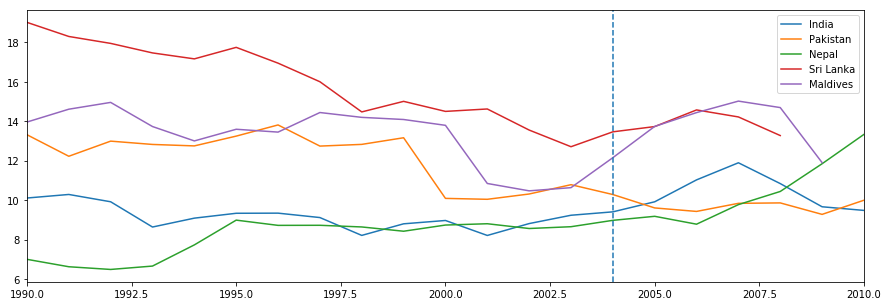

In [19]:
plt.figure(figsize=(15,5))
safta = ["India", "Pakistan", "Nepal", "Sri Lanka", "Maldives"]
for i in safta:
    plt.plot(df[df.country == i].year, df[df.country == i].Tax, label = i)
plt.legend(loc="upper right")
plt.axvline(x=2004, ls='--')
plt.xlim(1990, 2010)
plt.show()

### A série temporal mostra que a arrecadação de impostos não variou de forma uniforme entre os países pertencentes ao SAFTA, enfraquecendo a hipótese inicial de que sua criação diminuiria a arrecadação dos países participantes.

### O gráfico em barras seguinte mostra a variação da arrecadação dos países membros do SAFTA após o ano de 2004, e confirma o observado no gráfico anterior de que essa variação não foi uniforme entre os países.

In [23]:
mean_before = df_safta[df_safta['year'] < 2004].groupby("country").mean()['Tax'].reset_index().rename(columns={"Tax":"tax_before"})
mean_after = df_safta[df_safta['year'] > 2004].groupby("country").mean()['Tax'].reset_index().rename(columns={"Tax":"tax_after"})
mean_before["country"] = mean_before["country"].astype(str)
mean_after["country"] = mean_after["country"].astype(str)

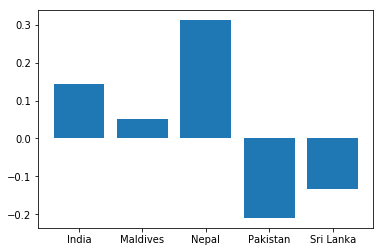

In [24]:
country_means = mean_before.merge(mean_after, how="outer")
country_means['relative_diff'] = country_means.apply(lambda row: (row['tax_after'] - row['tax_before']) / row['tax_before'], axis=1)
plt.bar(country_means['country'], country_means['relative_diff'])
plt.show()

### O gráfico seguinte mostra que os países de controle também apresentaram variação não uniforme da arrecadação de impostos após a criação do SAFTA, porém não permite nenhuma outra conclusão além disso

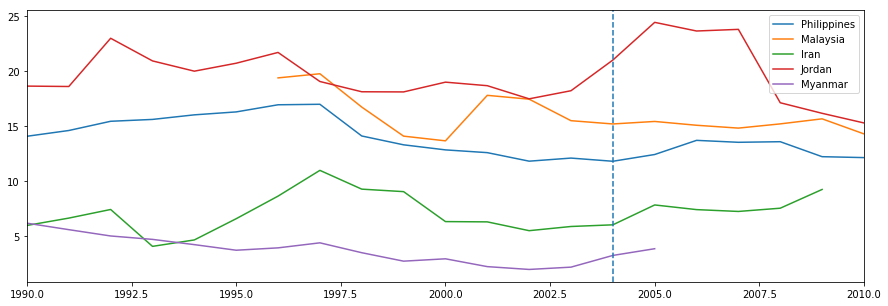

In [32]:
plt.figure(figsize=(15,5))
not_safta = ["Philippines", "Malaysia", "Iran", "Jordan", "Myanmar"]
for i in not_safta:
    plt.plot(df[df.country == i].year, df[df.country == i].Tax, label = i)
plt.axvline(x=2004, ls='--')
plt.legend(loc="upper right")
plt.xlim(1990, 2010)
plt.show()

### Novamente, o gráfico em barras mostra o observado anteriormente.

In [33]:
mean_before_not = df_not_safta[df_not_safta['year'] < 2004].groupby("country").mean()['Tax'].reset_index().rename(columns={"Tax":"tax_before"})
mean_after_not = df_not_safta[df_not_safta['year'] > 2004].groupby("country").mean()['Tax'].reset_index().rename(columns={"Tax":"tax_after"})
mean_before_not["country"] = mean_before_not["country"].astype(str)
mean_after_not["country"] = mean_after_not["country"].astype(str)

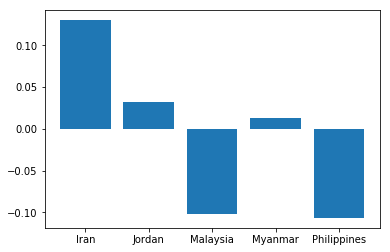

In [34]:
country_means_not = mean_before_not.merge(mean_after_not, how="outer")
country_means_not['relative_diff'] = country_means_not.apply(lambda row: (row['tax_after'] - row['tax_before']) / row['tax_before'], axis=1)
plt.bar(country_means_not['country'], country_means_not['relative_diff'])
plt.show()

### Em sequência, foram analisadas as médias das arrecadações de impostos dos países membros do SAFTA e dos países não membros. O gráfico mostra que em ambos os casos as médias subiram após a criação do SAFTA, enfraquecendo ainda mais a hipótese inicial. Além disso, em ambos os casos as médias de arrecadação começaram a crescer no ano de 2003, um ano antes da criação do SAFTA.

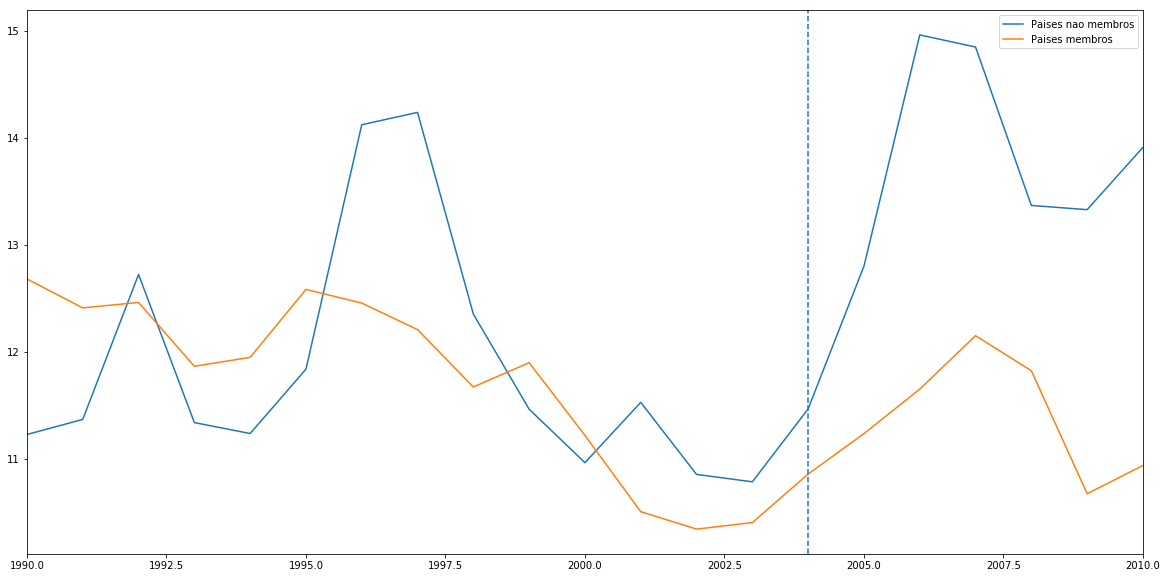

In [30]:
anos = list(range(1990, 2011))
media_safta = []
media_not_safta = []
for i in anos:
    media_safta.append(df_safta[df_safta.year == i].Tax.mean())
for i in anos:
    media_not_safta.append(df_not_safta[df_not_safta.year == i].Tax.mean())
plt.figure(figsize=(20,10))
plt.plot(anos, media_not_safta, label = "Paises nao membros")
plt.plot(anos, media_safta, label  = "Paises membros")
plt.legend(loc="upper right")
plt.axvline(x=2004, ls='--')
plt.xlim(1990, 2010)
plt.show()

### Como se trata de uma organização de livre comércio, foi analizado também se as taxas de importação (% do PIB) poderiam ter interferido na taxa de arrecadação de impostos. A série temporal abaixo mostra que as taxas de importação não variaram uniformemente após a criação do SAFTA.

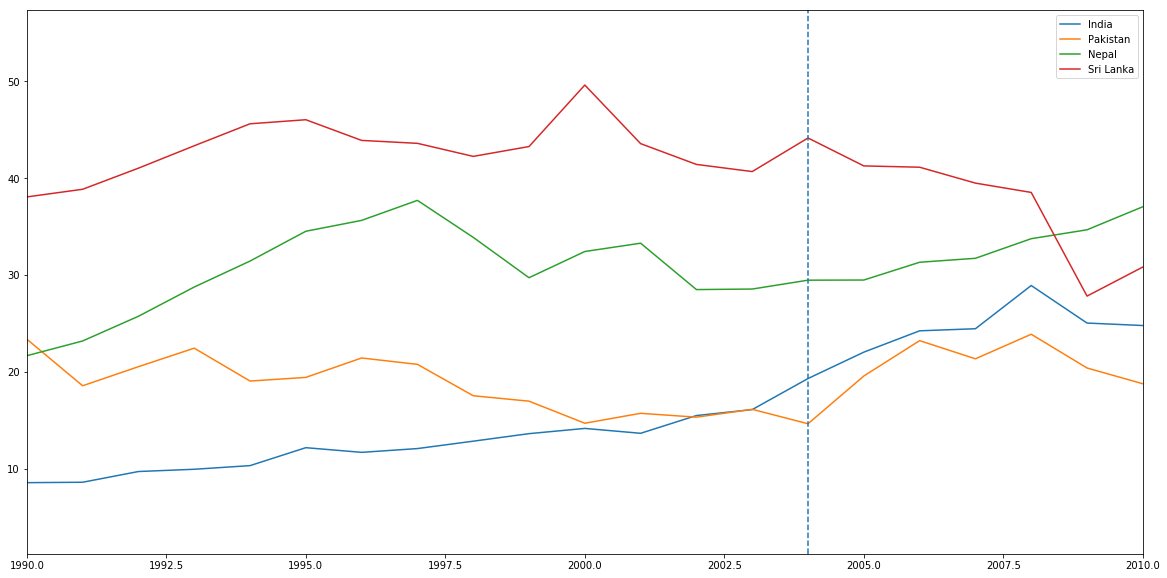

In [25]:
plt.figure(figsize=(20,10))
safta = ["India", "Pakistan", "Nepal", "Sri Lanka"]
for i in safta:
    plt.plot(df_imp[df_imp.country == i].year, df_imp[df_imp.country == i].imp, label = i )
plt.legend(loc="upper right")
plt.axvline(x=2004, ls='--')
plt.xlim(1990, 2010)
plt.show()

### A média das taxas de importação dos países membros subiu após a criação do SAFTA, porém esse crescimento teve início novamente em 2003, um ano antes de sua criação.

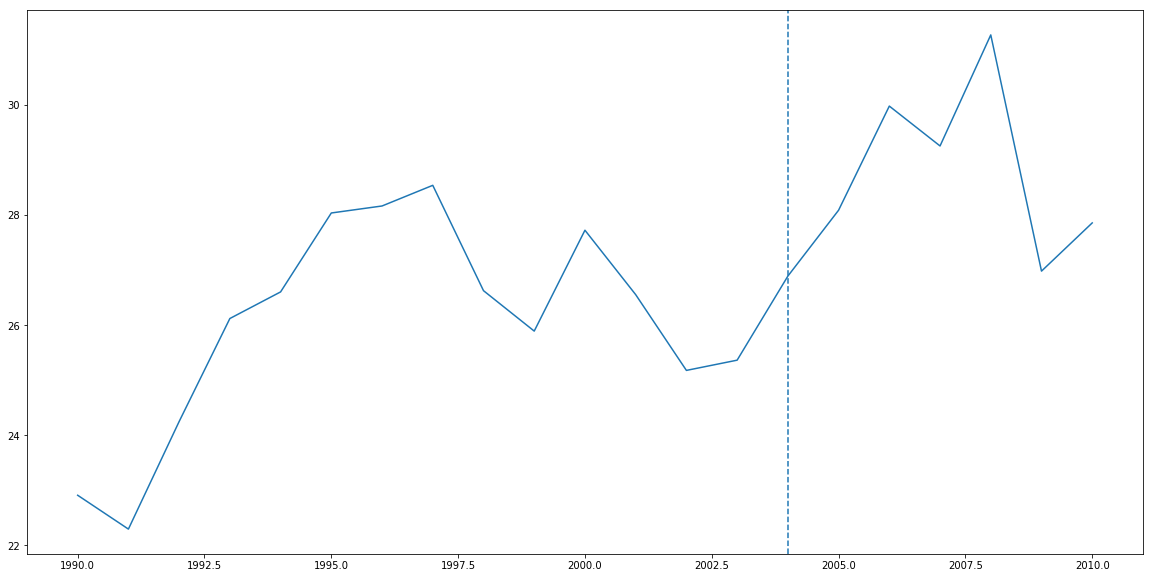

In [37]:
plt.figure(figsize=(20,10))
mean_imp = df_imp[(df_imp["country"].isin(safta)) & (df_imp["year"] >= 1990)].groupby("year").mean()["imp"].reset_index()
plt.plot(mean_imp["year"], mean_imp["imp"])
plt.axvline(x=2004, ls='--')
plt.show()

### Além disso, tanto o gráfico scatter quanto a matriz de correlação mostram que não há correlação entre a média da taxa de importação e a média da taxa de arrecadação de impostos dos países membros.

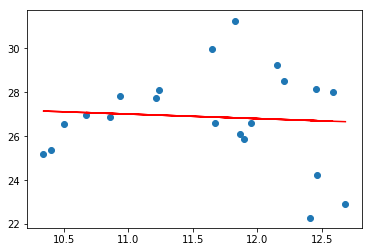

In [27]:
from numpy.polynomial.polynomial import polyfit

media_imp_safta = list(df_imp[(df_imp["country"].isin(safta)) & (df_imp["year"] >= 1990)].groupby("year").mean()["imp"])
plt.scatter(media_safta, media_imp_safta)
b, m = polyfit(media_safta, media_imp_safta, 1)
plt.plot(media_safta, b + m * np.array(media_safta), '-', color="red")

In [28]:
np.corrcoef(media_safta, media_imp_safta)

array([[ 1.        , -0.07255596],
       [-0.07255596,  1.        ]])